# Clustering

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style = 'darkgrid')
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN


In [3]:
df = pd.read_excel(r"C:\Users\lenovo\OneDrive\Desktop\Daily needs\DS Assingments\Clustering\Clustering\EastWestAirlines.xlsx", sheet_name = 'data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<Axes: >

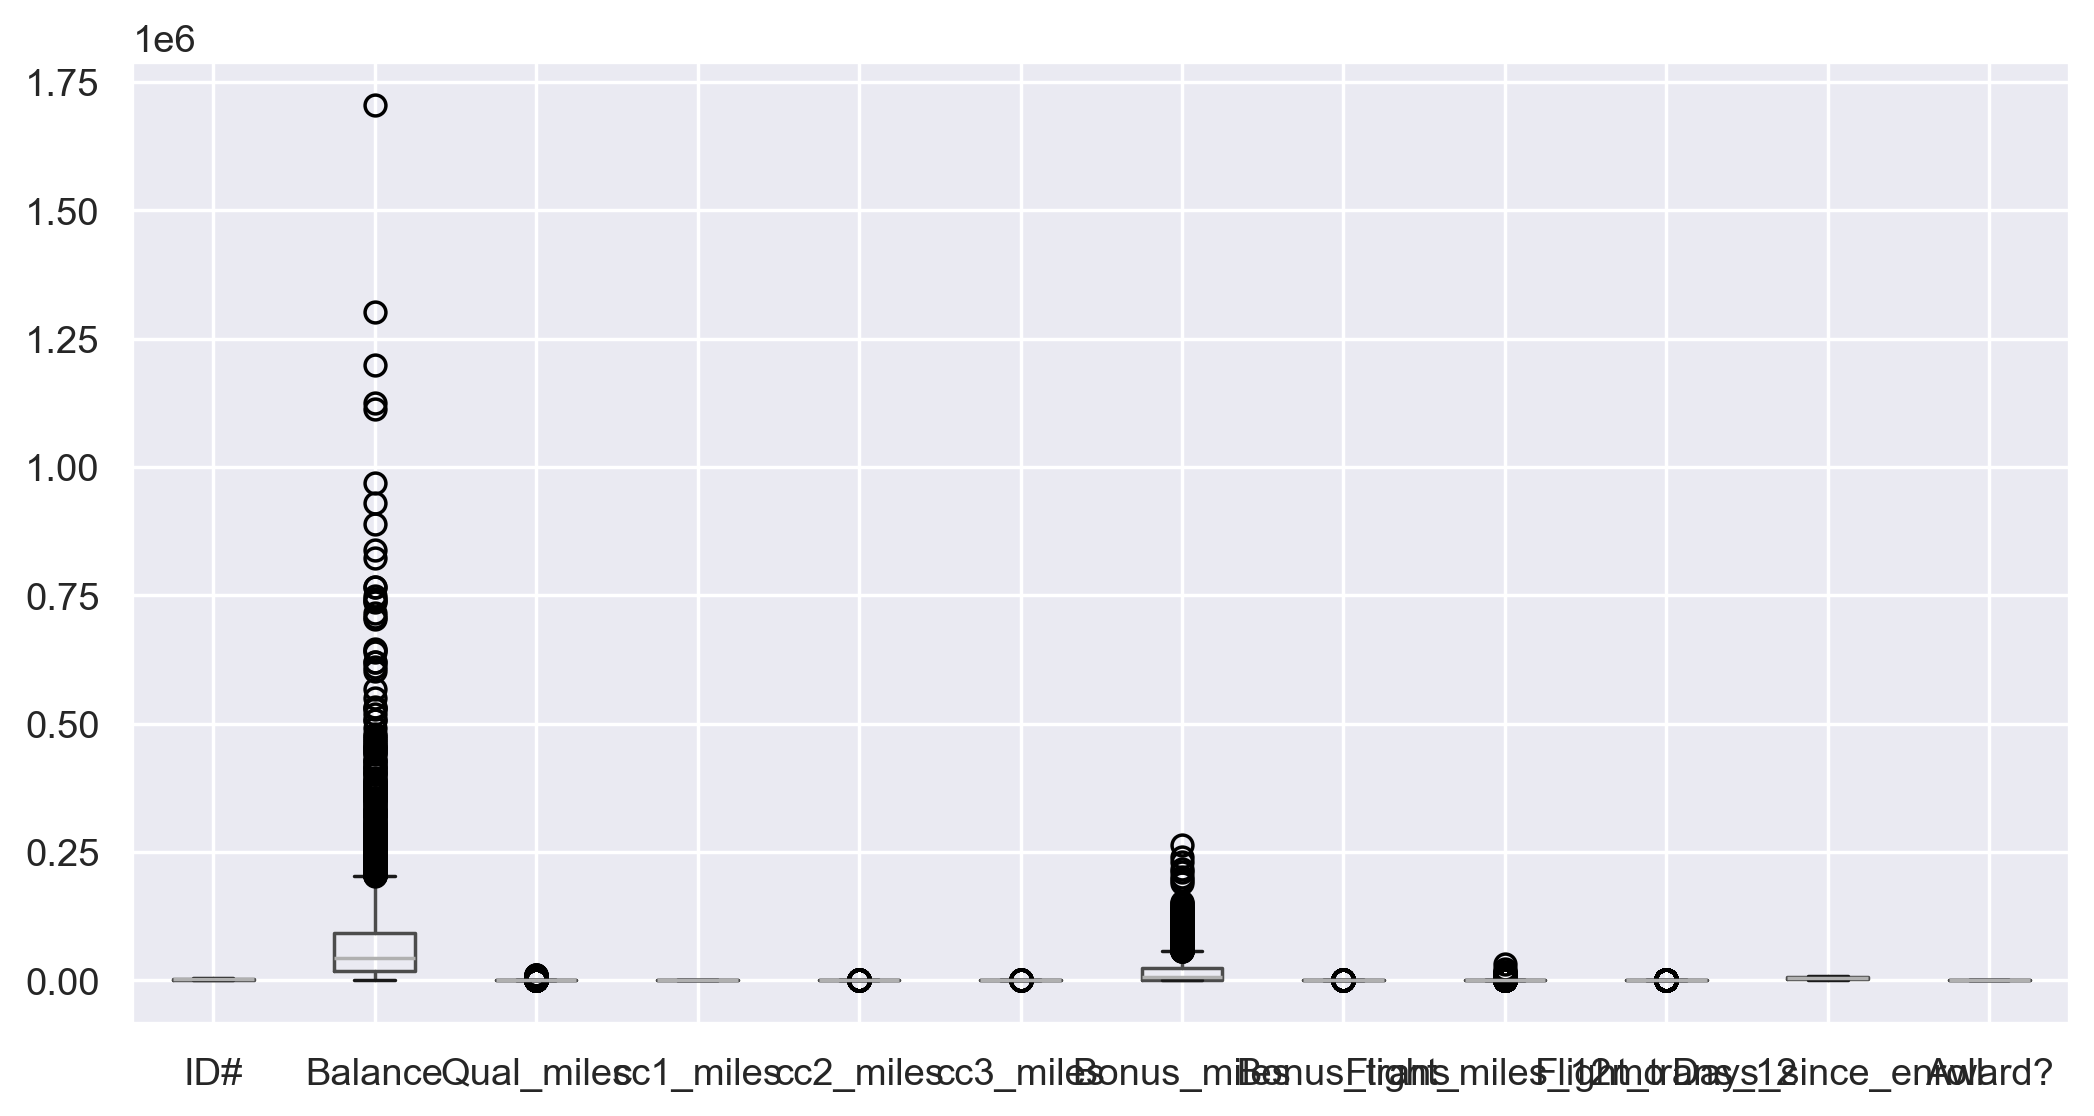

In [7]:
df.boxplot() # check outliers

In [8]:
def capping(data,columns):   # to handle outliers
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)

        df[col] = np.where(df[col] > upper,upper,np.where(df[col] < lower, lower, df[col]))

In [9]:
capping(df,df.columns)

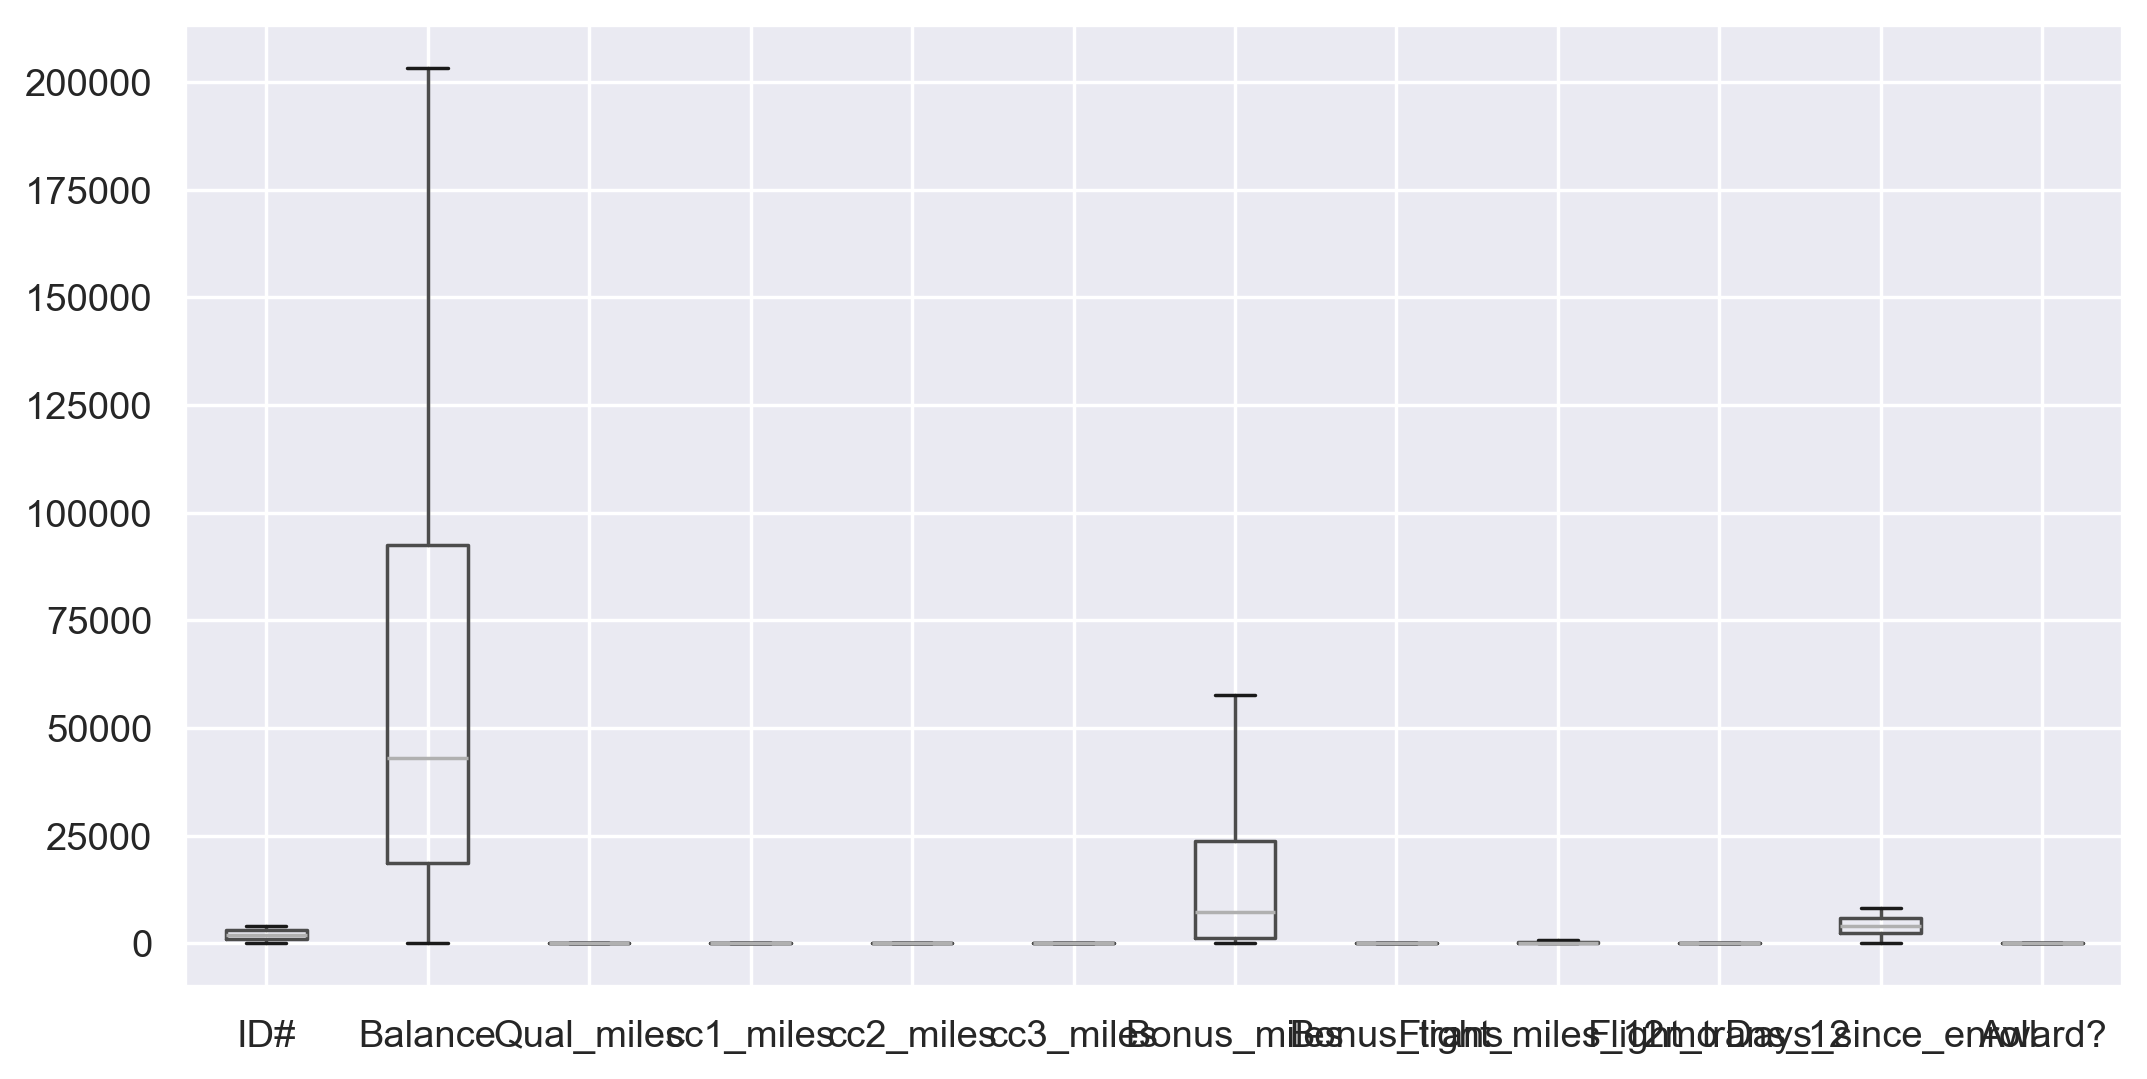

In [10]:
df.boxplot()
plt.show()

In [11]:
df.isna().sum() # check missing Values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
df.drop(columns = ['ID#'], inplace = True) # it is irrelevant data no need for clustering purpose.

In [13]:
sc = StandardScaler()

In [14]:
x = sc.fit_transform(df)

#  K-Means Clustering

In [16]:
df1 = df.copy()

In [17]:
# Model Building

In [18]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [19]:
wcss

[31992.000000000004,
 22258.77428380222,
 17745.91973700007,
 16023.98049105415,
 13879.117116073354,
 12483.106138195091,
 11802.859060770577,
 10774.647503497898,
 10254.324594880274,
 9533.558712370552]

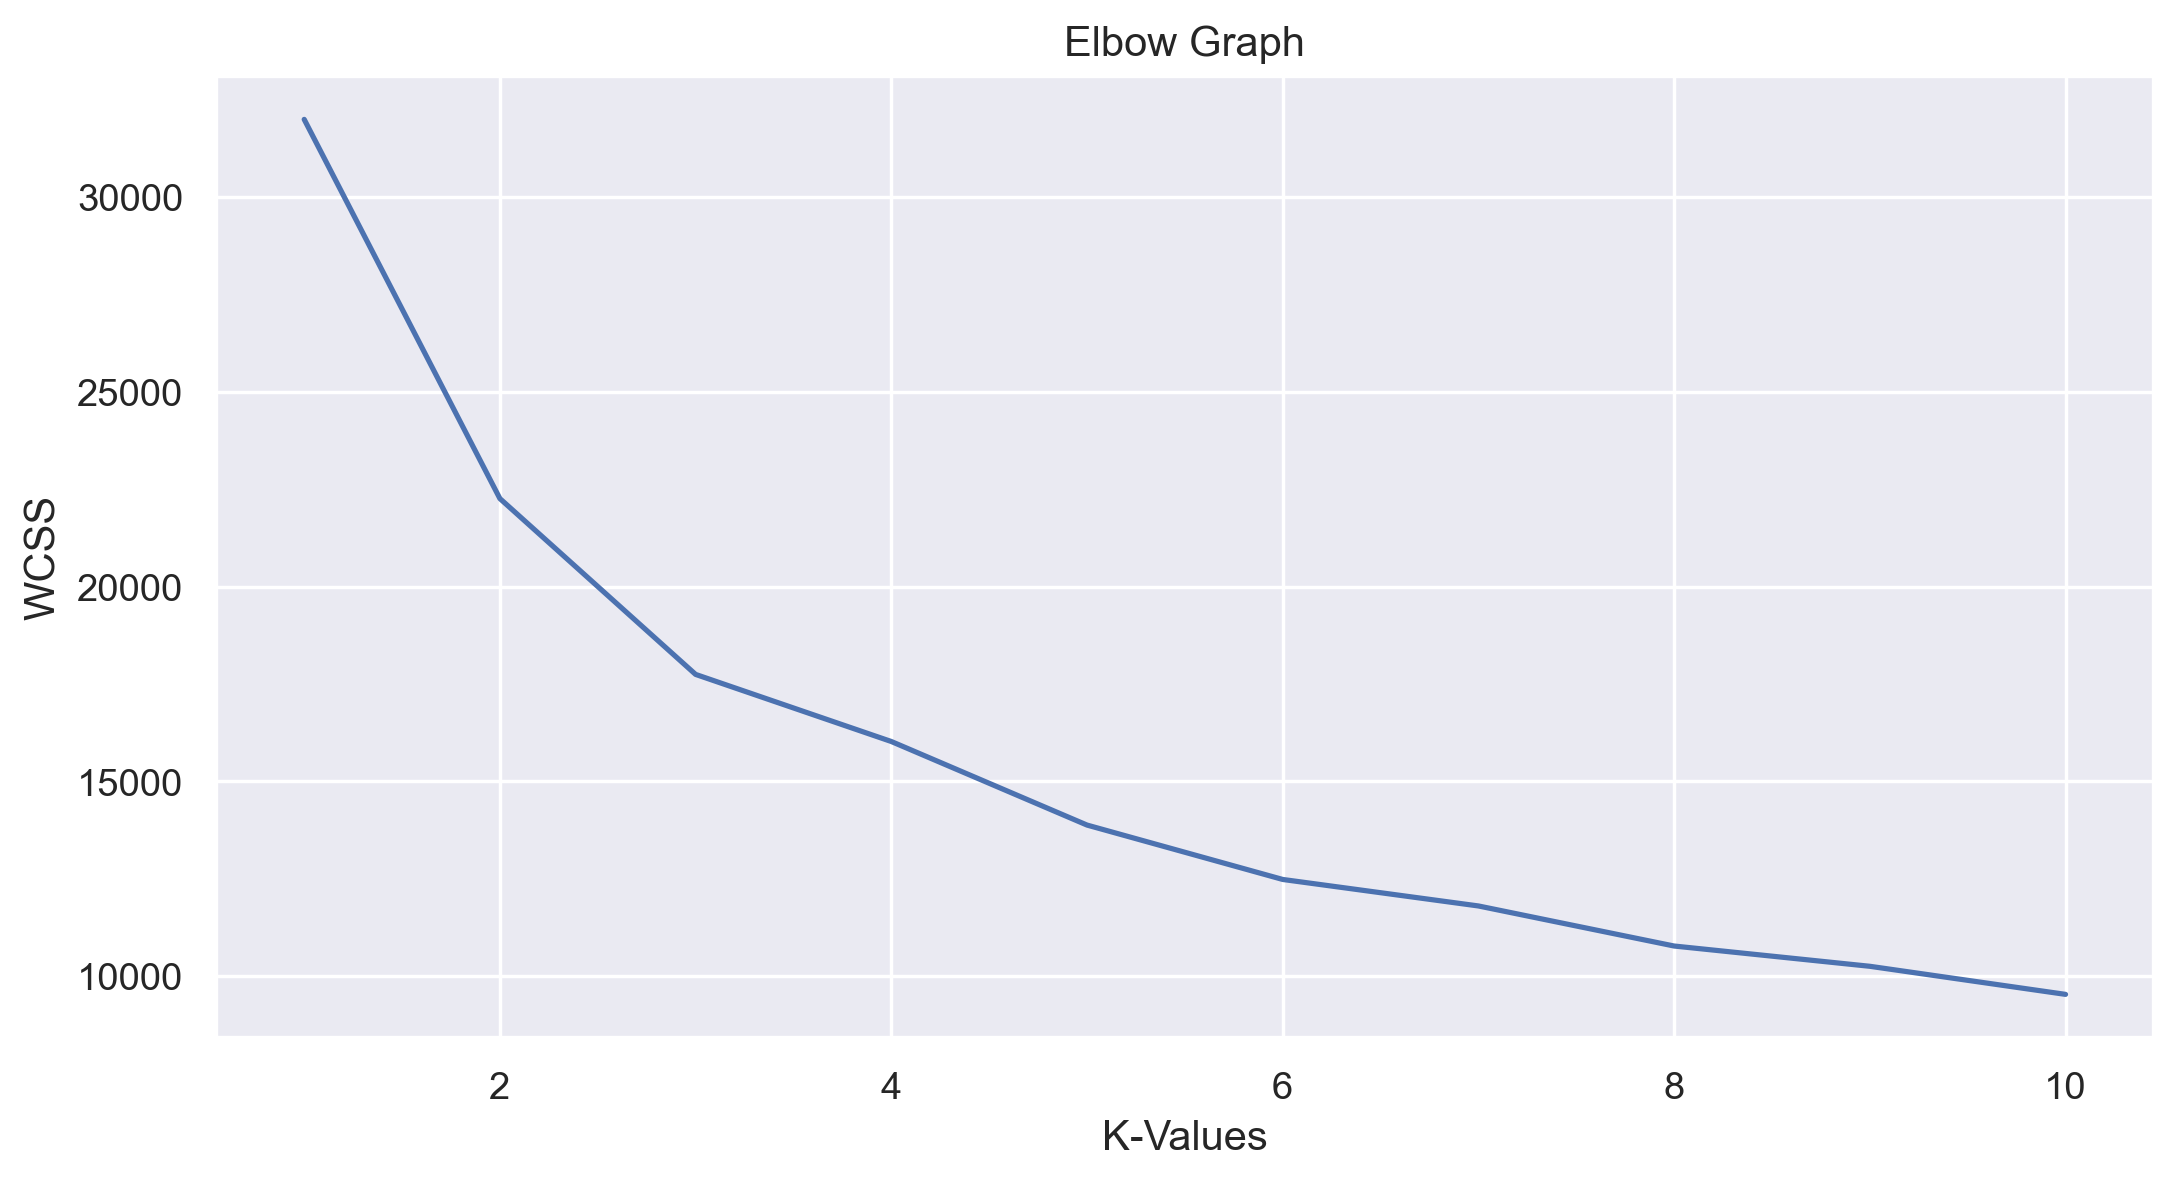

In [20]:
# Plotting Elbow graph to find n_clusters to be formed.
plt.plot(range(1,11),wcss)
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

In [21]:
km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
# Evaluation Metrics

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
df1['cluster'] = ypred

In [25]:
silhouette_score(x, ypred) 

0.307123045013532

In [26]:
df1['cluster'].value_counts()

cluster
0    1903
1    1078
3     617
2     401
Name: count, dtype: int64

In [27]:
# Model Interpretation

In [28]:
df1.groupby('cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,32720.379926,0.0,1.129795,1.0,1.0,3420.064635,5.959538,15.007357,0.074619,3555.567525,0.149238
1,88696.979360,0.0,3.454545,1.0,1.0,30234.419295,16.744898,26.167904,0.114100,4763.798701,0.517625
2,125077.225686,0.0,4.024938,1.0,1.0,44366.632793,24.927681,638.718204,2.018703,5041.586035,0.802993
3,76130.600081,0.0,1.212318,1.0,1.0,7674.886953,10.507293,646.921394,2.092382,4127.752026,0.513776


In [29]:
# Cluster  Interpretation
# 0        High Balance with active flyers
# 1        Very high balance with elite customers
# 2        Low Balance with low engagement group
# 3        Medium balance with budget flyers

# Hierarchial Clustering

In [31]:
df2 = df.copy()

In [32]:
# Model Building

In [33]:
from scipy.cluster import hierarchy

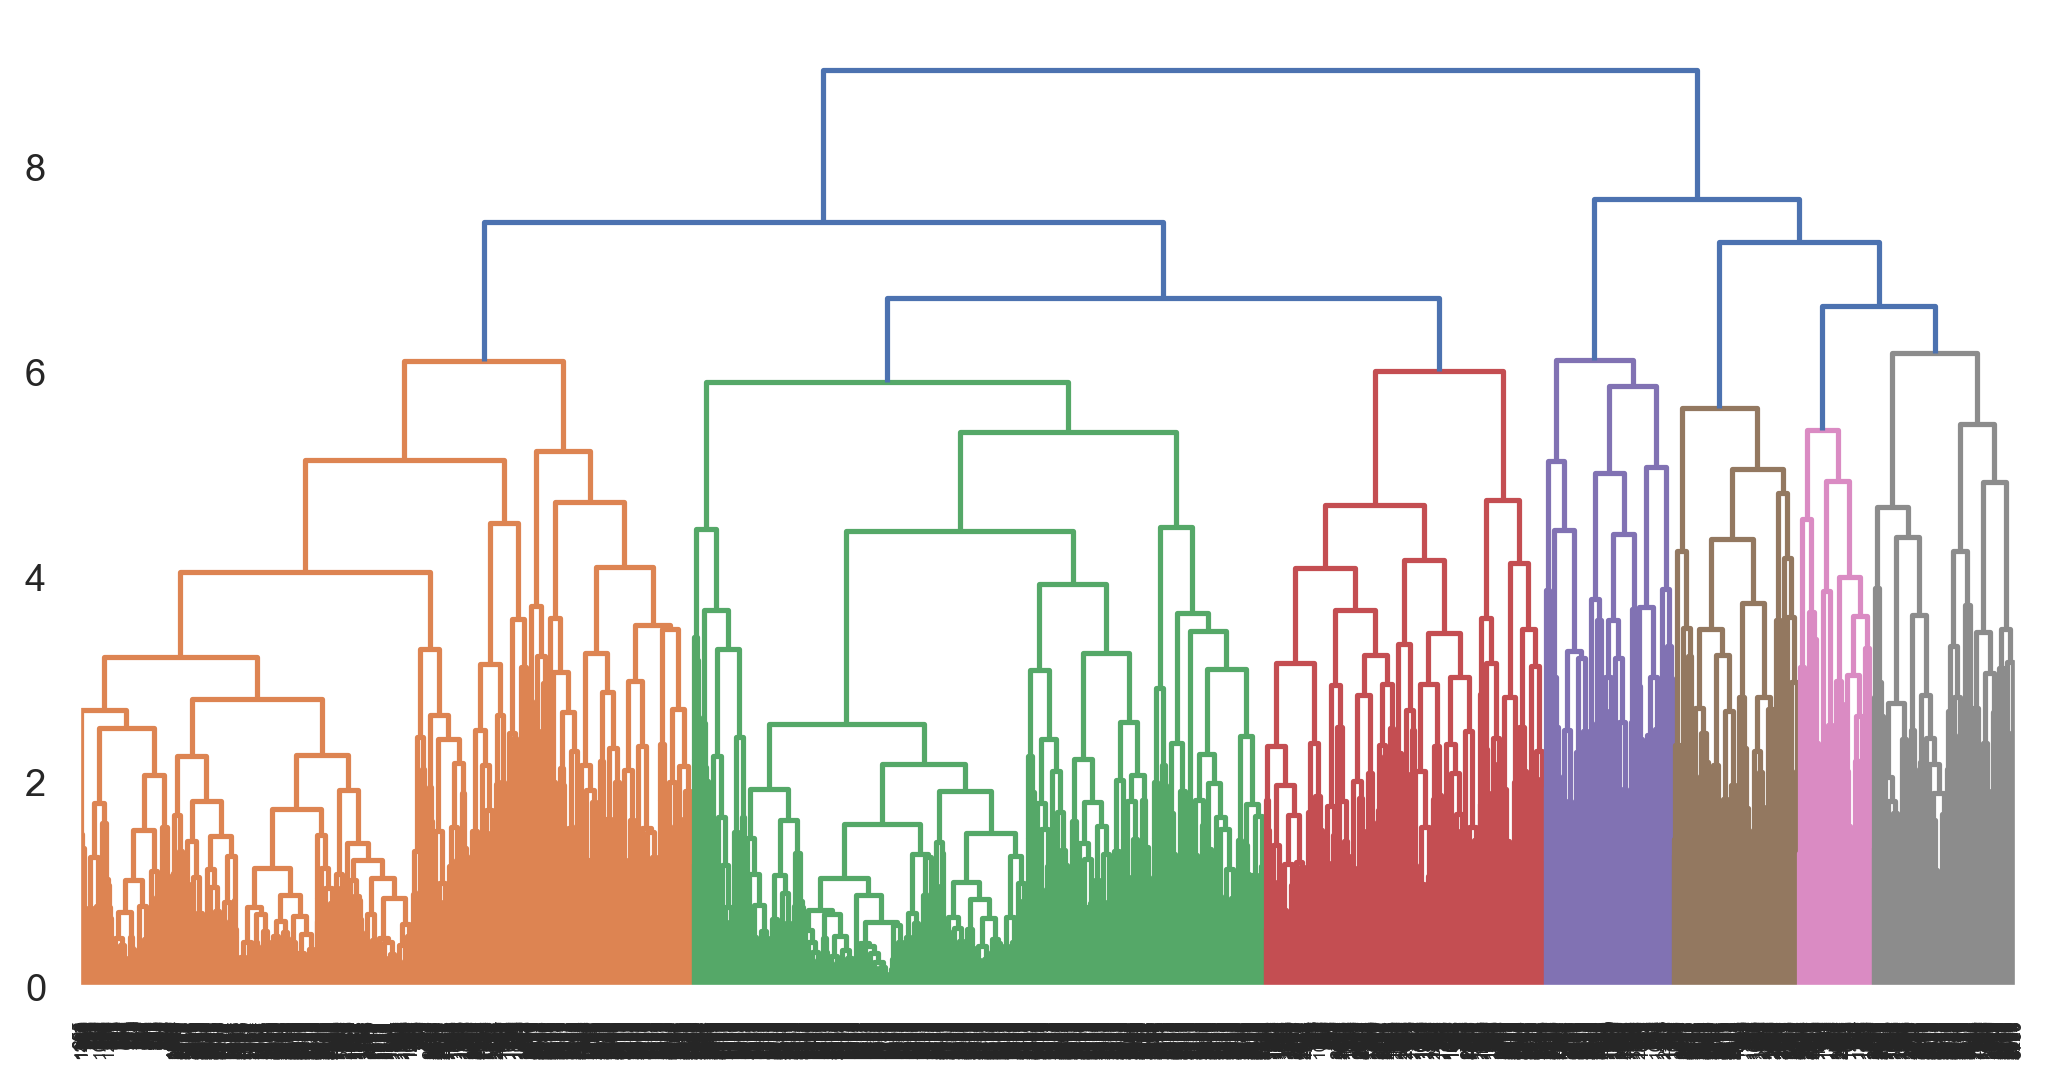

In [34]:
hl  = hierarchy.linkage(x, method = 'complete')
dendrogram = hierarchy.dendrogram(hl)
plt.show()

In [35]:
ac = AgglomerativeClustering(n_clusters = 4)

In [36]:
yp = ac.fit_predict(x)
yp

array([3, 3, 3, ..., 0, 2, 3], dtype=int64)

In [37]:
# Interpretation of cluster

In [38]:
df2['cluster'] = yp

In [39]:
df2.groupby('cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,79761.090040,0.0,2.423904,1.0,1.0,17918.174104,12.491633,55.899602,0.212749,4302.567331,0.563347
1,102337.149228,0.0,4.246998,1.0,1.0,46829.789880,21.929674,371.967410,1.209262,5057.771870,0.878216
2,78522.887374,0.0,1.441894,1.0,1.0,9787.424677,11.642755,609.373745,1.993544,4051.479197,0.375897
3,27675.953552,0.0,1.170082,1.0,1.0,3426.640027,6.348361,0.204918,0.002732,3618.739754,0.000000


In [40]:
# Interpretation                                                                                                                                                              |
# for 0 cluster High-value flyers with strong reward history users are present
# for 2 cluster High-mileage travelers are present                               |
# for 3 cluster New or inactive users are present 

# DBSCAN

In [42]:
# Model Building

In [43]:
db = DBSCAN(eps=0.5,min_samples=3)
y = db.fit_predict(x)
y

array([ 0,  0,  0, ..., 91, 79,  0], dtype=int64)

In [44]:
silhouette_score(x,y)

-0.2025652795477887

In [45]:
# Evaluation Metrics (Hyperparameter Tunnig)

In [46]:
df3 = df.copy()

In [47]:
from sklearn.neighbors import NearestNeighbors

In [48]:
neigh = NearestNeighbors(n_neighbors = 3).fit(x)

In [49]:
d,i = neigh.kneighbors(x)

In [50]:
distance = np.sort(d[:,1])
distance

array([0.        , 0.        , 0.00331797, ..., 1.72263836, 1.85654914,
       2.09874831])

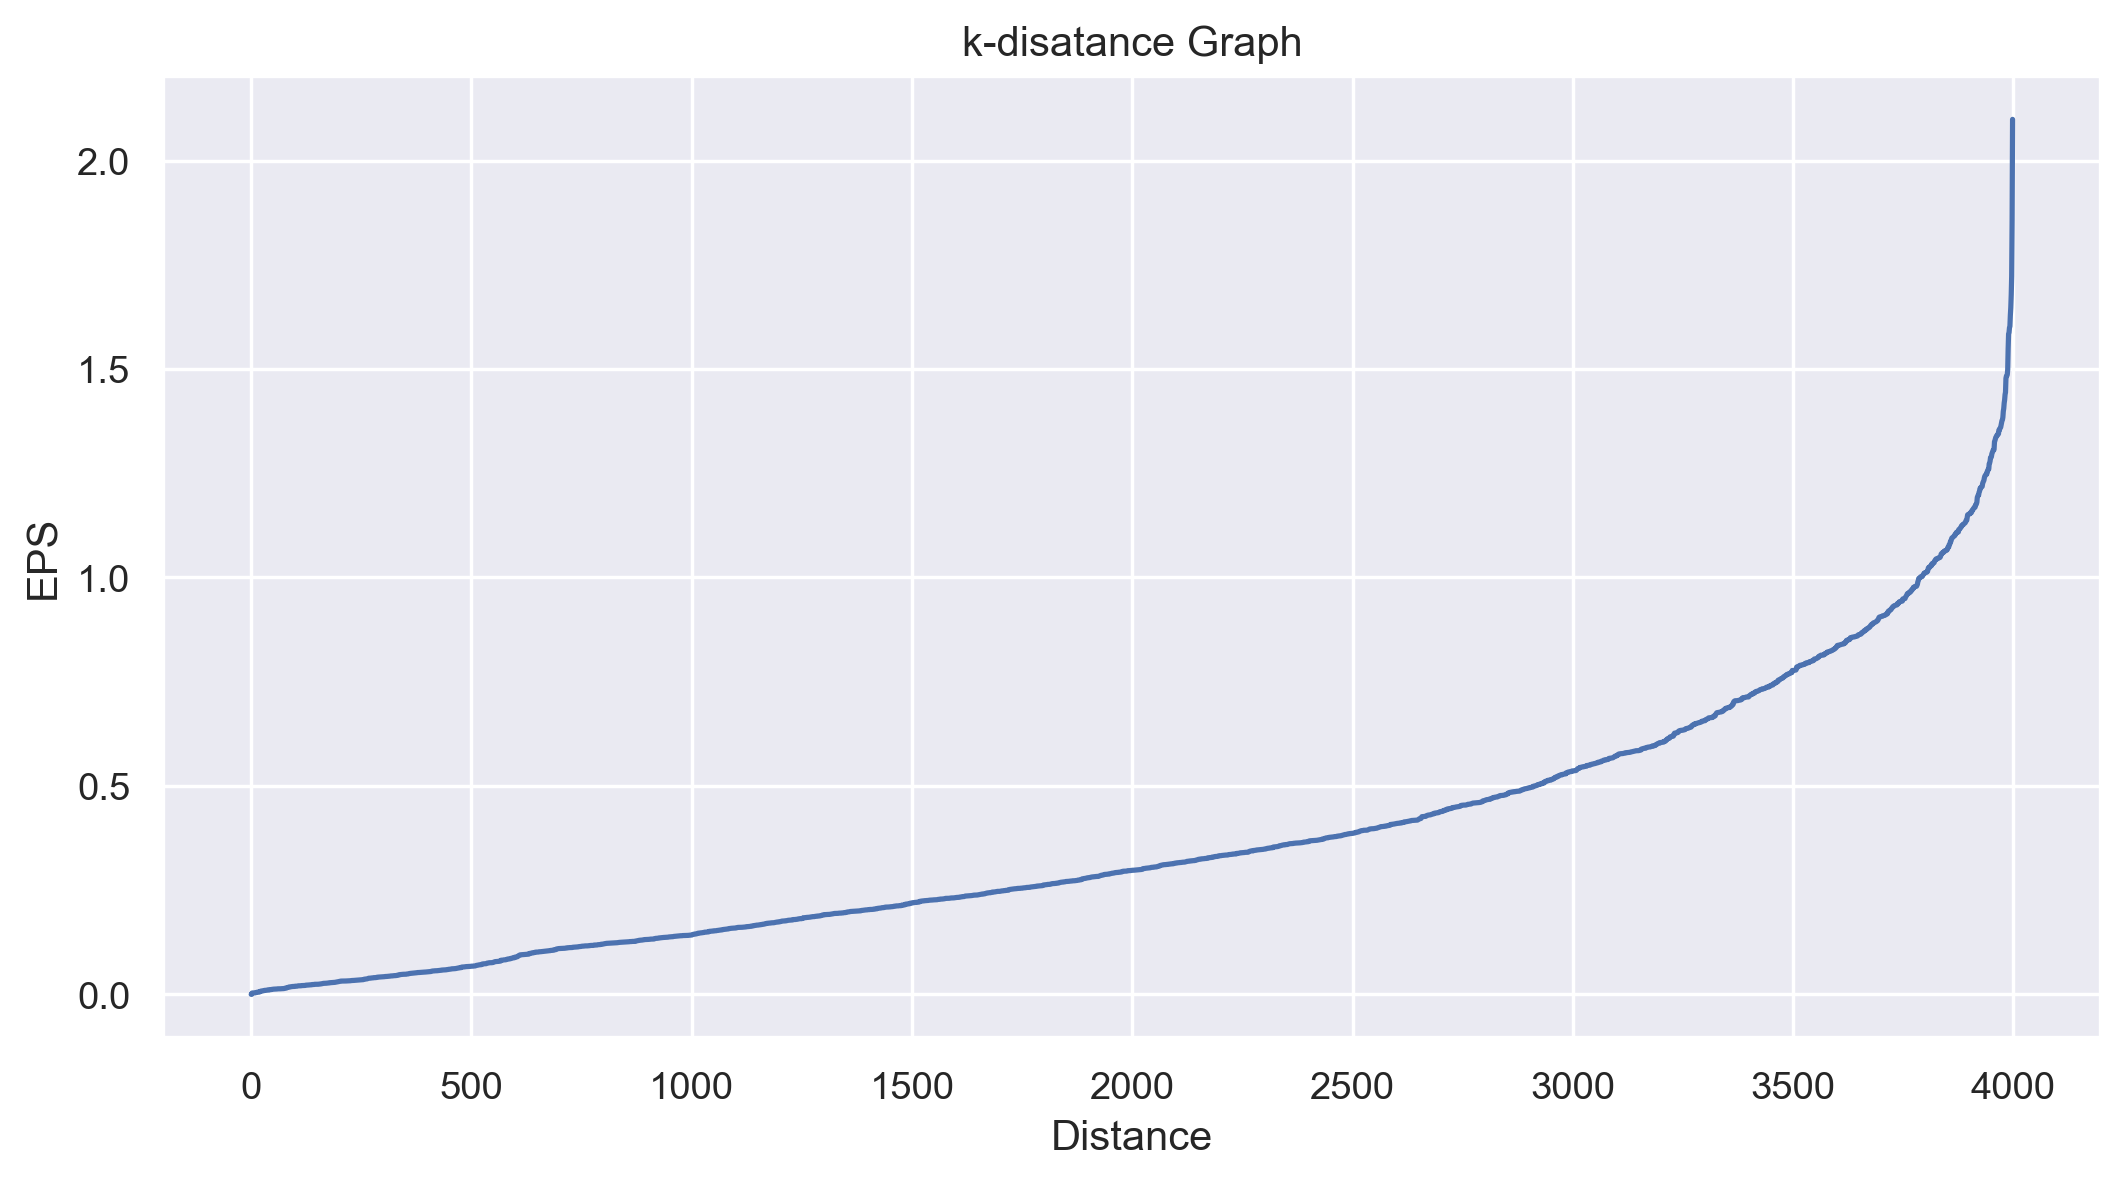

In [51]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('k-disatance Graph')
plt.show()

In [52]:
db = DBSCAN(eps=1.5,min_samples=24)
y = db.fit_predict(x)
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
silhouette_score(x,y) # silhouttee score 

0.21585568023401197

In [54]:
# Model Interpretation

In [55]:
df3['cluster'] = y

In [56]:
df3.groupby('cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1,145525.804455,0.0,3.153465,1.0,1.0,33743.184406,23.242574,528.858911,1.784653,4708.737624,0.480198
0,52093.008392,0.0,1.623705,1.0,1.0,8779.039681,8.510568,91.076254,0.311645,3774.925404,0.000000
1,72192.292449,0.0,2.659682,1.0,1.0,24297.374277,14.913295,278.502890,0.905347,4631.545520,1.000000


In [57]:
# by seeing the data we can say that at -1 cluster outliers may be present

# Final Interpertation
- by analyzing the silhouetee score of K-means and DBSCAN we can say that there is a overlapping of clusters built.
- we have use capping method to overcome but it was not much effective.
- so to get rid of curse of dimensionality we can use PCA for further analysis to get a generalized model. 